In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)                   #normalizing
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K).T
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_train = np.insert(x_train,3072,np.zeros((50000,)),axis=1).T # add zeros to include the biasing trick 3073 x 50000
x_test = x_test.astype('float32')
x_test = np.insert(x_test,3072,np.zeros((10000,)),axis=1).T
std=1e-5
w_0 = std*np.random.randn(K, Din)    #weights initialization 10x3072
w_0 = np.insert(w_0,3072,np.zeros((10,)),axis = 1)  #biasing trick 10x3073
#b1 = np.zeros(K)                    #biasing
print("w_0:", w_0.shape)  
print("x_train:", x_train.shape)
epochs = 300    
lr = 0.017    
lr_decay= 0.99995
reg =  0.0000000001
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
#for t in range(iterations):
    #indices = np.arange(Ntr)
    #rng.shuffle(indices)
    # Forward pass
    # Backward pass
    # Printing accuracies and displaying w as images

x_train:  (50000, 32, 32, 3)
w_0: (10, 3073)
x_train: (3073, 50000)


In [5]:
def accuracy(scores,ytrain):
    predclass = np.argmax(scores,axis=0)
    trueclass = np.argmax(ytrain,axis=0)
    return ( np.sum(predclass==trueclass)/trueclass.size )

def sensitivity(scores,ytrain,category):
    correct_indices = np.argmax(ytrain,axis=0)
    true_positive = np.sum(predclass==trueclass)
    true_negative = np.sum

def loss_function(x_tr,y_tr,reg,w1): 
    global scores
    scores = w1.dot(x_tr)                                              # scores is a 10x50000 array
    #print(scores.shape)
    train_acc_history.append(accuracy(scores, y_tr))                                
    loss = (1./50000)*np.square(scores-y_tr).sum()  + reg*np.sum([np.sum(w*w)for w in w1])
    loss_history.append(loss)

def grad_analytical(scores,x_tr,y_tr,reg,w_mat):
    grad = (1./50000)*(2.0)*((scores-y_tr).dot(x_tr.T)) + 2*reg*w_mat
    return grad

#def sampler(x,size):


0.0

In [6]:
iteration = 0
while iteration < epochs:
    loss_function(x_train,y_train,reg,w_0)
    val_scores = w_0.dot(x_test)
    val_acc_history.append(accuracy(val_scores, y_test.T))
    w_grad = grad_analytical(scores,x_train,y_train,reg,w_0)
    w_0 += -lr*w_grad    #descent
    lr *= lr_decay
    print('epoch:{}, loss: {}, train_acc: {},validation_acc: {}'.format(iteration,loss_history[iteration],train_acc_history[iteration],val_acc_history[iteration]))
    iteration += 1


ation_acc: 0.3905
epoch:45, loss: 0.8979323537003969, train_acc: 0.39492,validation_acc: 0.3917
epoch:46, loss: 0.8976968564944785, train_acc: 0.3954,validation_acc: 0.3917
epoch:47, loss: 0.8974671863454079, train_acc: 0.39584,validation_acc: 0.3922
epoch:48, loss: 0.897243052317443, train_acc: 0.3959,validation_acc: 0.392
epoch:49, loss: 0.8970241847449355, train_acc: 0.3964,validation_acc: 0.3921
epoch:50, loss: 0.8968103333600107, train_acc: 0.39666,validation_acc: 0.3923
epoch:51, loss: 0.8966012656077986, train_acc: 0.39682,validation_acc: 0.3926
epoch:52, loss: 0.8963967651275726, train_acc: 0.3974,validation_acc: 0.3924
epoch:53, loss: 0.8961966303811021, train_acc: 0.39772,validation_acc: 0.3926
epoch:54, loss: 0.8960006734120015, train_acc: 0.39824,validation_acc: 0.3931
epoch:55, loss: 0.8958087187219775, train_acc: 0.39854,validation_acc: 0.3934
epoch:56, loss: 0.8956206022516146, train_acc: 0.39888,validation_acc: 0.394
epoch:57, loss: 0.8954361704548515, train_acc: 0.3993

In [44]:
print(scores[:,0],'\n',y_test.T[:,0])

[-0.2246265   0.06849898 -0.06781321  0.12509381  0.05778842  0.08686466
  0.10565389  0.09544747 -0.23523295 -0.01155176] 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


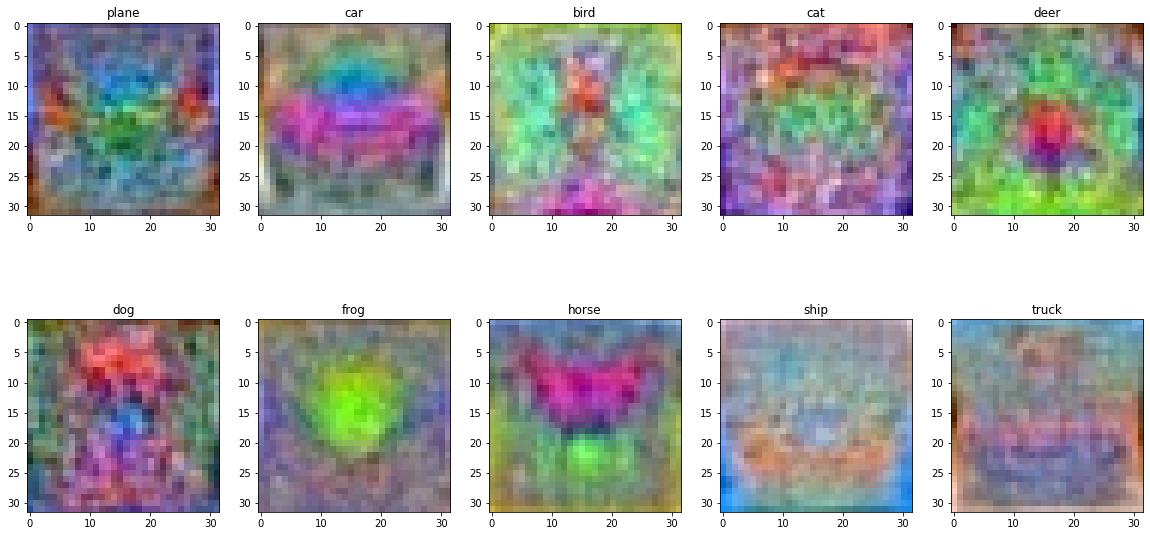

In [74]:
w_0_copy = w_0
w_0_copy = np.delete(w_0_copy,3072,axis=1)
img=[[],[],[],[],[],[],[],[],[],[]]
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(w_0.shape[0]):
    img_i = w_0_copy[i,:]
    img[i]= (255.0*(img_i-min(img_i))/(max(img_i)-min(img_i))).reshape(32,32,3)     #remap to image values so can be dispalyed
    img[i] = img[i].astype("uint8")                                                 #change data type
fig, axes =  plt.subplots(2,5,figsize=(20,10))
k =0
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(img[k])
        axes[i,j].set_title(classes[k])
        k+=1
plt.show()


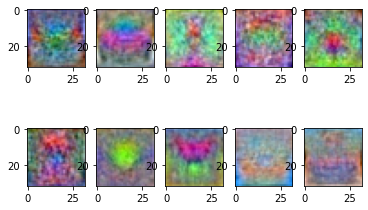

In [22]:
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
a = tf.constant(a, shape=[4, 4])
print(a)

tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)


In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
np.hstack()

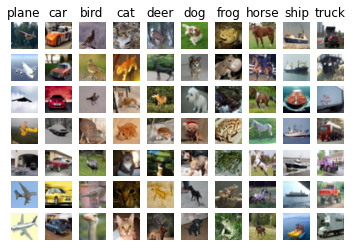

In [16]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [106]:
x_copy= np.insert(x_copy,3072,np.zeros((50000,)),axis=1)
print(x_copy[:,-1].shape)

(50000,)


In [63]:
batch_indices = np.random.choice(Ntr,batchsize)
rng.shuffle(batch_indices)
x = x_train.T[batch_indices].T
y = y_train.T[batch_indices].T
x.shape

(3073, 500)